In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [5]:
file_path = 'Supermarket Customers.csv'

In [6]:
df = pd.read_csv(file_path, delimiter='\t')

In [7]:
print('Banyak data: ', df.shape[0])
print('Banyak kolom: ', df.shape[1])

Banyak data:  2240
Banyak kolom:  29


In [8]:
people_columns = [
    'ID', 'Year_Birth', 'Education', 'Marital_Status',
    'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
    'Recency', 'Complain'
]

products_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

promotion_columns = [
    'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'
]

place_columns = [
    'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

df_people = df[people_columns]
df_products = df[products_columns]
df_promotion = df[promotion_columns]
df_place = df[place_columns]

# People

In [9]:
df_people

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0


## Data Cleaning

1. Cek Missing Value

In [10]:
x = (df_people.isnull().any(axis=1).sum() / len(df_people)) * 100
print(f'Total baris kosong {x:.2f}%')

Total baris kosong 1.07%


In [11]:
print(df_people.isnull().sum())

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Dt_Customer        0
Recency            0
Complain           0
dtype: int64


2. Menangani Missing Value

In [12]:
mean_income = df_people['Income'].mean()
df_people.loc[df_people['Income'].isnull(), 'Income'] = mean_income

In [13]:
x = (df_people.isnull().any(axis=1).sum() / len(df_people)) * 100
print(f'Total baris kosong {x:.2f}%')

Total baris kosong 0.00%


In [14]:
print(df_people.isnull().sum())

ID                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Dt_Customer       0
Recency           0
Complain          0
dtype: int64


3. Pengecekan Outlier

In [15]:
# Menghitung IQR untuk kolom Income
Q1 = df_people['Income'].quantile(0.25)
Q3 = df_people['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = df_people[(df_people['Income'] < lower_bound) | (df_people['Income'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
          ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  Complain  
164          1  01-03-2014       98         0  
617          1  03-06-2013       31         0  
655          0  07-02-2014       81         0  
687          0  04-08-2012       21         0  
1300         0  04-06-2013       37         0  
1653         0  29-04-2013       13        

4. Penanganan Pengecekan Outlier

In [16]:
# Menghapus outlier dari DataFrame
df_people = df_people[~((df_people['Income'] < lower_bound) | (df_people['Income'] > upper_bound))]

5. Data Formating

In [17]:
df_people.loc[:, 'Dt_Customer'] = pd.to_datetime(df_people['Dt_Customer'], errors='coerce')
df_people.loc[:, 'Marital_Status'] = df_people['Marital_Status'].str.lower()

6. Pengecekan Duplicate

In [18]:
# Mengecek duplikat
duplicates = df_people.duplicated().sum()
print("Jumlah Duplikat:", duplicates)

Jumlah Duplikat: 0


In [19]:
print(f"Total data setelah data cleansing: {df_people.shape[0]}")

Total data setelah data cleansing: 2232


## Exploratory Data Analysis (EDA)

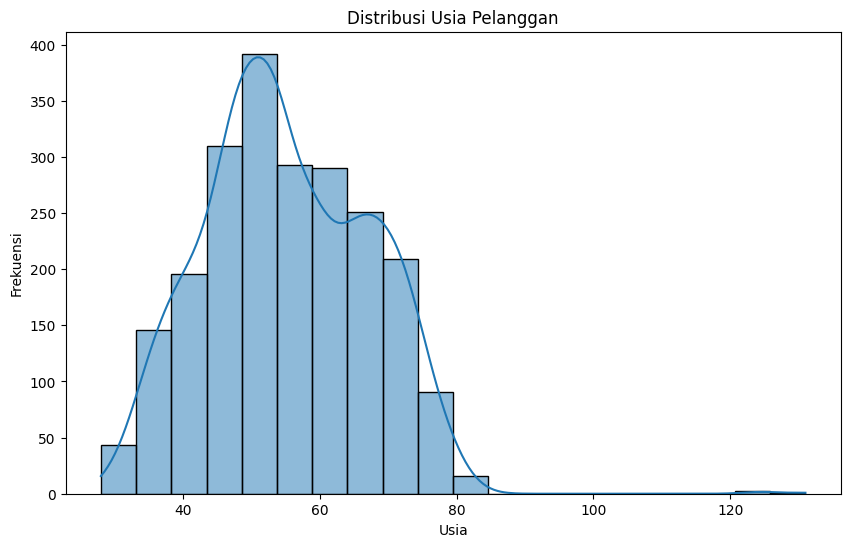

In [20]:
if 'Age' not in df.columns:
    from datetime import datetime
    current_year = datetime.now().year
    df['Age'] = current_year - df['Year_Birth']

# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi ini, dapat dilihat bahwa mayoritas pelanggan berada pada rentang usia sekitar 40 hingga 70 tahun, dengan puncak frekuensi di usia sekitar 50 tahun. Pola ini memberikan pemahaman awal tentang kelompok usia dominan di antara pelanggan supermarket, yang dapat membantu dalam menyesuaikan strategi pemasaran dan penawaran produk agar lebih relevan bagi segmen usia ini.

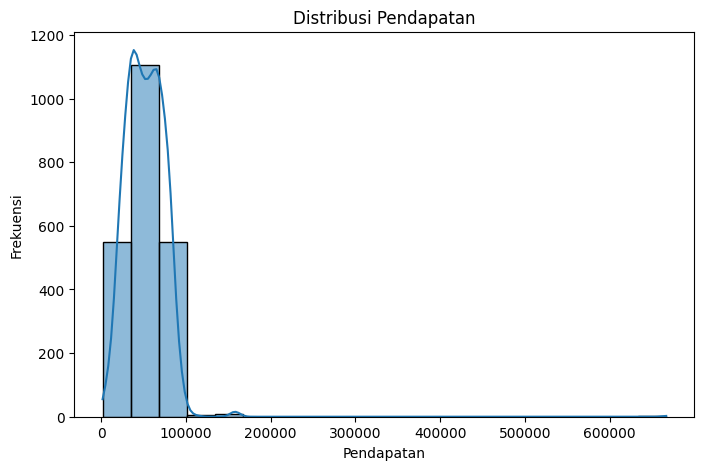

In [21]:
# Distribusi Pendapatan
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()

Distribusi ini juga menunjukkan bahwa ada beberapa nilai pendapatan yang sangat tinggi, meskipun jarang, yang menyebabkan distribusi menjadi right-skewed atau mencuat ke kanan. Informasi ini penting dalam memahami rentang dan pola pendapatan pelanggan, yang bisa membantu supermarket dalam menargetkan segmen pelanggan tertentu dengan strategi pemasaran yang sesuai.

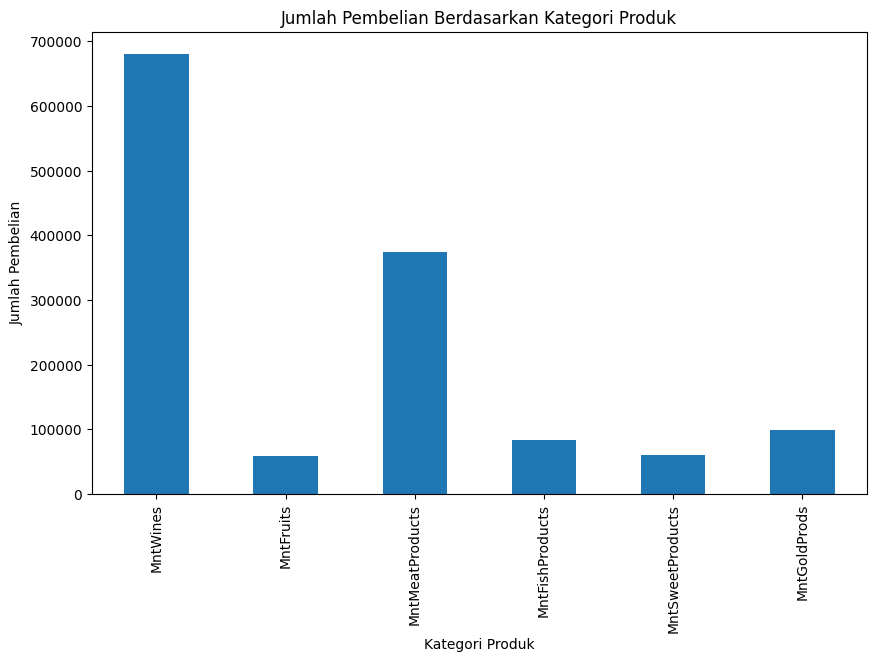

In [22]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df[product_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah Pembelian Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.show()

## Perhitungan

In [23]:
# Menghitung jumlah keluhan dengan nilai 1
jumlah_complain_1 = (df_people['Complain'] == 1).sum()

# Menghitung jumlah keluhan dengan nilai 0
jumlah_complain_0 = (df_people['Complain'] == 0).sum()

print(f"Jumlah komplain (nilai 1): {jumlah_complain_1}")
print(f"Jumlah komplain (nilai 0): {jumlah_complain_0}")

Jumlah komplain (nilai 1): 21
Jumlah komplain (nilai 0): 2211


In [24]:
# Menghitung rata-rata pendapatan
avg_income = df_people['Income'].mean()

print(f"Rata-rata pendapatan: {round(avg_income, 2)}")

Rata-rata pendapatan: 51640.24


In [25]:
# Menambah kolom usia ke dalam dataframme people
current_year = datetime.now().year
df_people = df_people.copy()
df_people['Age'] = current_year - df_people['Year_Birth']

In [26]:
# Menghitung nilai min, max, dan avg usia
min_age = df_people['Age'].min()
max_age = df_people['Age'].max()
avg_age = df_people['Age'].mean()

print(f"Usia paling kecil: {min_age}")
print(f"Usia paling besar: {max_age}")
print(f"Usia rata-rata: {round(avg_age)}")

Usia paling kecil: 28
Usia paling besar: 131
Usia rata-rata: 55


# Product

In [27]:
df_products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


## Data Cleaning

1. Cek Missing Value

In [28]:
x = (df_products.isnull().any(axis=1).sum() / len(df_products)) * 100
print(f'Total baris kosong {x:.2f}%')

Total baris kosong 0.00%


In [29]:
print(df_products.isnull().sum())

MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64


2. Pengecekan Outlier

In [30]:
# Menghitung IQR dan mendeteksi outlier
for column in df_products.columns:
    Q1 = df_products[column].quantile(0.25)
    Q3 = df_products[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menandai outlier
    outliers = df_products[(df_products[column] < lower_bound) | (df_products[column] > upper_bound)]
    print(f"Outliers untuk {column}:\n", outliers)

Outliers untuk MntWines:
       MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
111       1332         17              311               23                51   
161       1349         16              249               43                16   
295       1241          0               80                0                13   
424       1285         42              716               55                 0   
430       1248         16              349               43                16   
466       1239         17              413               23                34   
497       1396          0              322               46                35   
515       1288         20              613               80                61   
523       1379         33              216                0                33   
543       1478         19              403                0                19   
559       1492         38              287               50                57   
82

3. Penanganan Pengecekan Outlier

In [31]:
# Menghapus outlier dari DataFrame
for column in df_products.columns:
    Q1 = df_products[column].quantile(0.25)
    Q3 = df_products[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_products = df_products[~((df_products[column] < lower_bound) | (df_products[column] > upper_bound))]

4. Pengecekan Duplicate

In [32]:
# Mengecek duplikat
duplicates = df_products.duplicated().sum()
print("Jumlah Duplikat:", duplicates)

Jumlah Duplikat: 124


5. Penanganan Duplicate

In [33]:
df_products = df_products.drop_duplicates()

In [34]:
print(f"Total data setelah data cleansing: {df_products.shape[0]}")

Total data setelah data cleansing: 1159


## Exploratory Data Analysis

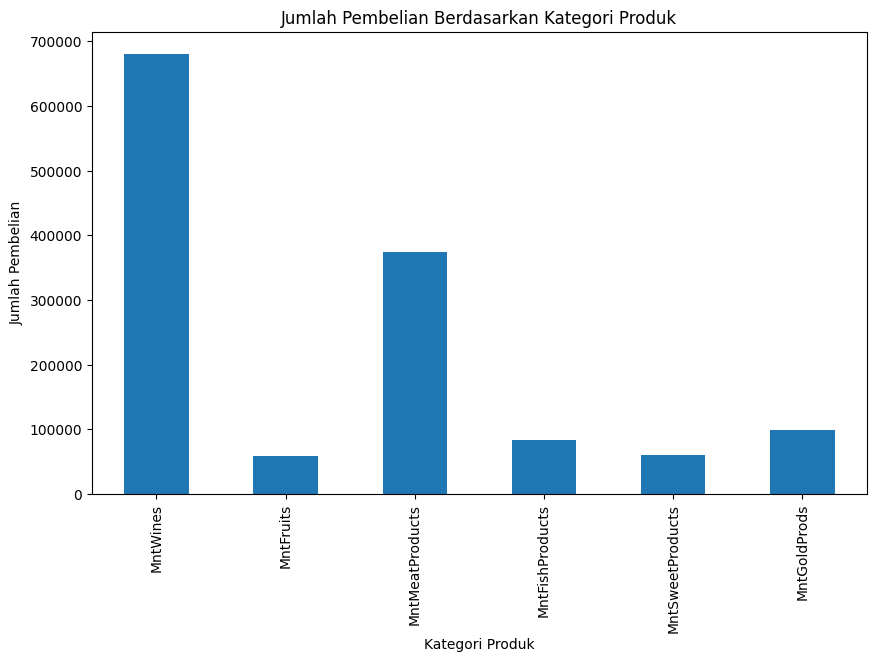

In [35]:
# Jumlah Pembelian Berdasarkan Kategori Produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[product_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah Pembelian Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.show()

## Perhitungan

In [36]:
# Menghitung jumlah keluhan dengan nilai 1
df_products.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,136.695427,6.038827,39.741156,7.283003,5.067299,16.723900
std,225.540302,9.001595,51.759544,8.928094,6.182791,15.520883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,9.000000,0.000000,0.000000,5.000000
50%,31.000000,3.000000,19.000000,4.000000,3.000000,12.000000
75%,159.000000,8.000000,50.500000,11.000000,8.000000,24.000000
max,1184.000000,71.000000,376.000000,49.000000,26.000000,70.000000


# Promotion

In [37]:
df_promotion # Menampilkan dataFrame Products

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,3,0,0,0,0,0,1
1,2,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,2,0,0,0,0,0,0
2236,7,1,0,0,0,0,0
2237,1,0,0,0,1,0,0
2238,2,0,0,0,0,0,0


## Data Cleaning

1. Cek Missing Value

In [38]:
x = (df_promotion.isnull().any(axis=1).sum() / len(df_promotion)) * 100
print(f'Total baris kosong {x:.2f}%')

Total baris kosong 0.00%


In [39]:
print(df_promotion.isnull().sum())

NumDealsPurchases    0
AcceptedCmp1         0
AcceptedCmp2         0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
Response             0
dtype: int64


2. Pengecekan Outlier

In [40]:
# Menghitung IQR dan mendeteksi outlier
for column in df_promotion.columns:
    Q1 = df_promotion[column].quantile(0.25)
    Q3 = df_promotion[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menandai outlier
    outliers = df_promotion[(df_promotion[column] < lower_bound) | (df_promotion[column] > upper_bound)]
    print(f"Outliers untuk {column}:\n", outliers)

Outliers untuk NumDealsPurchases:
       NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
21                   15             0             0             0   
24                    7             0             0             0   
49                    9             0             0             0   
54                    7             0             0             0   
69                    7             0             0             0   
...                 ...           ...           ...           ...   
2090                  7             0             0             0   
2144                  7             0             0             0   
2198                  7             0             0             1   
2226                  8             0             0             0   
2236                  7             1             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  
21               0             0         0  
24               0             0         0  
4

3. Penanganan Pengecekan Outlier

In [41]:
# Menghapus outlier dari DataFrame
for column in df_promotion.columns:
    Q1 = df_promotion[column].quantile(0.25)
    Q3 = df_promotion[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_promotion = df_promotion[~((df_promotion[column] < lower_bound) | (df_promotion[column] > upper_bound))]

In [42]:
print(f"Total data setelah data cleansing: {df_products.shape[0]}")

Total data setelah data cleansing: 1159


## Exploratory Data Analysis (EDA)

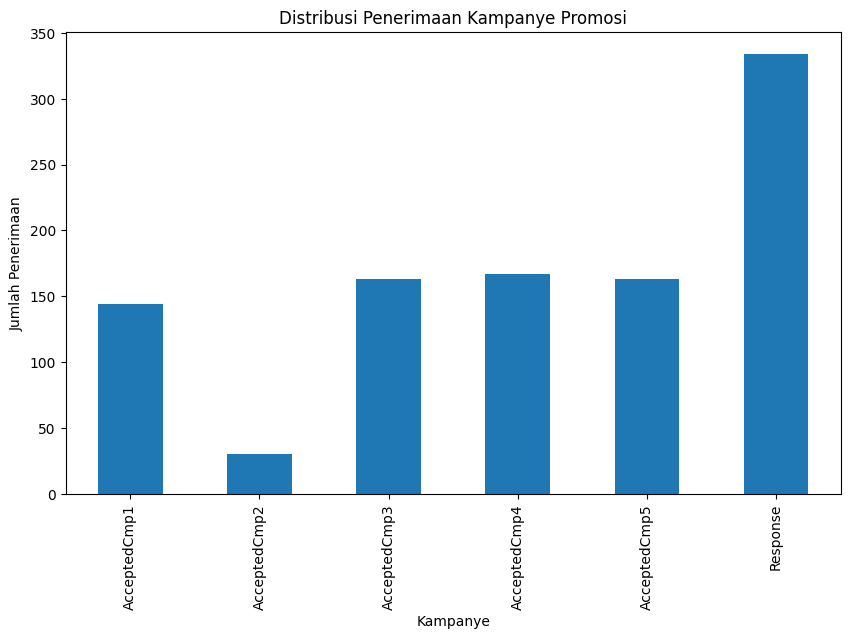

In [43]:
# Distribusi Respon Terhadap Kampanye Promosi
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[campaign_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Distribusi Penerimaan Kampanye Promosi')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Penerimaan')
plt.show()

## Perhitungan

In [44]:
# Menghitung jumlah pelanggan yang menerima tawaran pada setiap campaign
campaign_1 = (df['AcceptedCmp1'] == 1).sum()
campaign_2 = (df['AcceptedCmp2'] == 1).sum()
campaign_3 = (df['AcceptedCmp3'] == 1).sum()
campaign_4 = (df['AcceptedCmp4'] == 1).sum()
campaign_5 = (df['AcceptedCmp5'] == 1).sum()
campaign_last = (df['Response'] == 1).sum()

print(f"Jumlah pelanggan menerima tawaran pada campaign 1: {campaign_1}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 2: {campaign_2}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 3: {campaign_3}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 4: {campaign_4}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 5: {campaign_5}")
print(f"Jumlah pelanggan menerima tawaran pada campaign terakhir: {campaign_last}")

Jumlah pelanggan menerima tawaran pada campaign 1: 144
Jumlah pelanggan menerima tawaran pada campaign 2: 30
Jumlah pelanggan menerima tawaran pada campaign 3: 163
Jumlah pelanggan menerima tawaran pada campaign 4: 167
Jumlah pelanggan menerima tawaran pada campaign 5: 163
Jumlah pelanggan menerima tawaran pada campaign terakhir: 334


# Place

In [45]:
df_place # Menampilkan dataFrame Products

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4
3,2,0,4,6
4,5,3,6,5
...,...,...,...,...
2235,9,3,4,5
2236,8,2,5,7
2237,2,3,13,6
2238,6,5,10,3


## Data Cleansing

1. Cek Missing Value

In [46]:
x = (df_place.isnull().any(axis=1).sum() / len(df_place)) * 100
print(f'Total baris kosong {x:.2f}%')

Total baris kosong 0.00%


In [47]:
print(df_place.isnull().sum())

NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64


2. Pengecekan Outlier

In [48]:
# Menghitung IQR dan mendeteksi outlier
for column in df_place.columns:
    Q1 = df_place[column].quantile(0.25)
    Q3 = df_place[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menandai outlier
    outliers = df_place[(df_place[column] < lower_bound) | (df_place[column] > upper_bound)]
    print(f"Outliers untuk {column}:\n", outliers)

Outliers untuk NumWebPurchases:
       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
27                 27                    0                  0   
1806               23                    1                  1   
1898               27                    0                  0   
1975               25                    0                  0   

      NumWebVisitsMonth  
27                    1  
1806                  0  
1898                  1  
1975                  1  
Outliers untuk NumCatalogPurchases:
       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21                  0                   28                  0   
104                 3                   11                  5   
164                 0                   22                  0   
288                 5                   11                  5   
586                 5                   11                  5   
591                 5                   11                  5   
627                

3. Penanganan Pengecekan Outlier

In [49]:
# Menghapus outlier dari DataFrame
for column in df_place.columns:
    Q1 = df_place[column].quantile(0.25)
    Q3 = df_place[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_promotion = df_place[~((df_place[column] < lower_bound) | (df_place[column] > upper_bound))]

In [50]:
print(f"Total data setelah data cleansing: {df_place.shape[0]}")

Total data setelah data cleansing: 2240


## Perhitungan

In [51]:
# Menghitung jumlah pelanggan yang menerima tawaran pada setiap campaign
campaign_1 = (df['AcceptedCmp1'] == 1).sum()
campaign_2 = (df['AcceptedCmp2'] == 1).sum()
campaign_3 = (df['AcceptedCmp3'] == 1).sum()
campaign_4 = (df['AcceptedCmp4'] == 1).sum()
campaign_5 = (df['AcceptedCmp5'] == 1).sum()
campaign_last = (df['Response'] == 1).sum()

print(f"Jumlah pelanggan menerima tawaran pada campaign 1: {campaign_1}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 2: {campaign_2}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 3: {campaign_3}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 4: {campaign_4}")
print(f"Jumlah pelanggan menerima tawaran pada campaign 5: {campaign_5}")
print(f"Jumlah pelanggan menerima tawaran pada campaign terakhir: {campaign_last}")

Jumlah pelanggan menerima tawaran pada campaign 1: 144
Jumlah pelanggan menerima tawaran pada campaign 2: 30
Jumlah pelanggan menerima tawaran pada campaign 3: 163
Jumlah pelanggan menerima tawaran pada campaign 4: 167
Jumlah pelanggan menerima tawaran pada campaign 5: 163
Jumlah pelanggan menerima tawaran pada campaign terakhir: 334


In [52]:
df_place.describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,4.084821,2.662054,5.790179,5.316518
std,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000
50%,4.000000,2.000000,5.000000,6.000000
75%,6.000000,4.000000,8.000000,7.000000
max,27.000000,28.000000,13.000000,20.000000


# Segmentasi Pelanggan Berdasarkan Pendapatan dan Pengeluaran

Kode ini membagi pelanggan ke dalam segmen berdasarkan pendapatan dan menghitung rata-rata pengeluaran mereka di berbagai kategori.

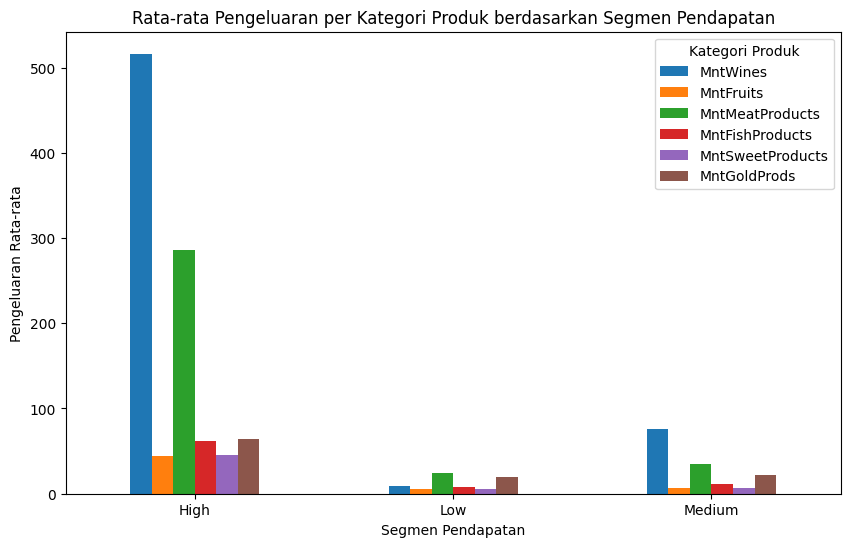

In [53]:
df['Total_Spending'] = df[products_columns].sum(axis=1)

# Membuat segmen pendapatan
def income_segment(income):
    if income < 20000:
        return 'Low'
    elif 20000 <= income < 50000:
        return 'Medium'
    else:
        return 'High'

df['Income_Segment'] = df['Income'].apply(income_segment)

# Menghitung rata-rata pengeluaran berdasarkan segmen
spending_by_segment = df.groupby('Income_Segment')[products_columns].mean().reset_index()

# Visualisasi
spending_by_segment.set_index('Income_Segment').plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Pengeluaran per Kategori Produk berdasarkan Segmen Pendapatan')
plt.ylabel('Pengeluaran Rata-rata')
plt.xlabel('Segmen Pendapatan')
plt.xticks(rotation=0)
plt.legend(title='Kategori Produk')
plt.show()

# Korelasi antara Pengeluaran untuk Produk dan Pembelian melalui Katalog

Menghitung dan memvisualisasikan korelasi antara pengeluaran produk dan pembelian melalui katalog.

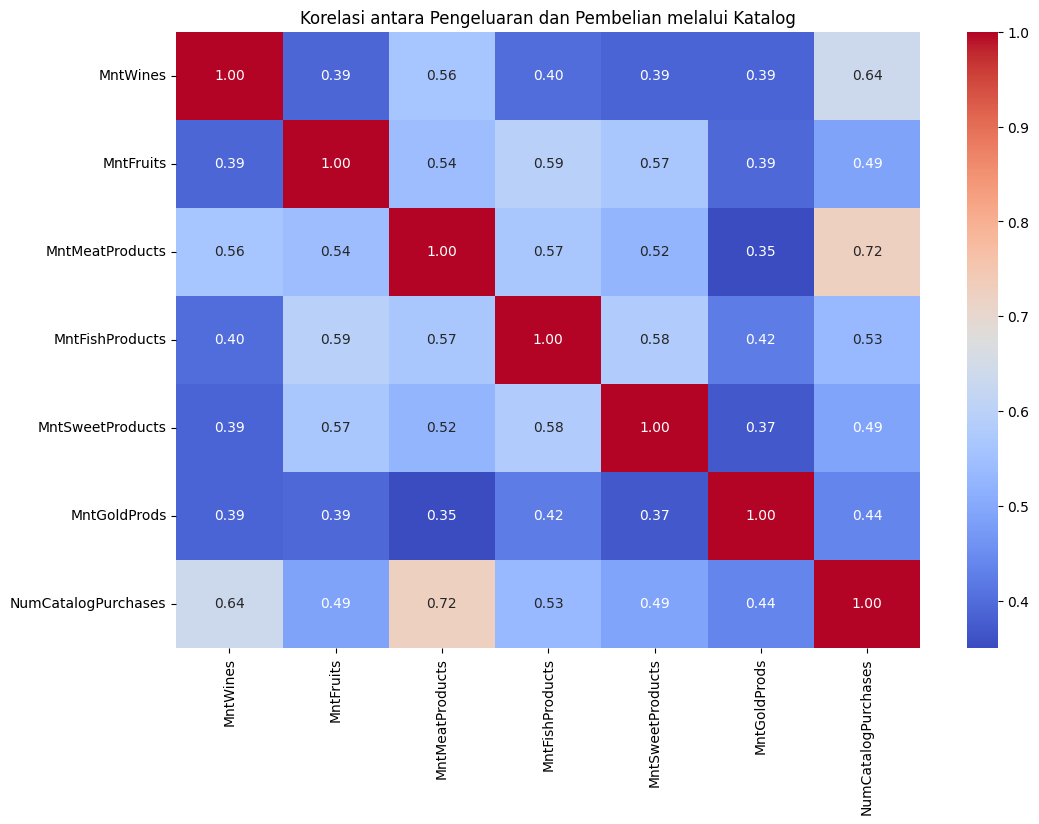

In [54]:
# Menghitung korelasi antara pengeluaran produk dan pembelian melalui katalog
correlation_data = df[products_columns + ['NumCatalogPurchases']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Pengeluaran dan Pembelian melalui Katalog')
plt.show()

# Preferensi Belanja Pelanggan Berdasarkan Kategori Produk

Menghitung total pengeluaran per kategori dan memvisualisasikannya dalam bentuk pie chart.

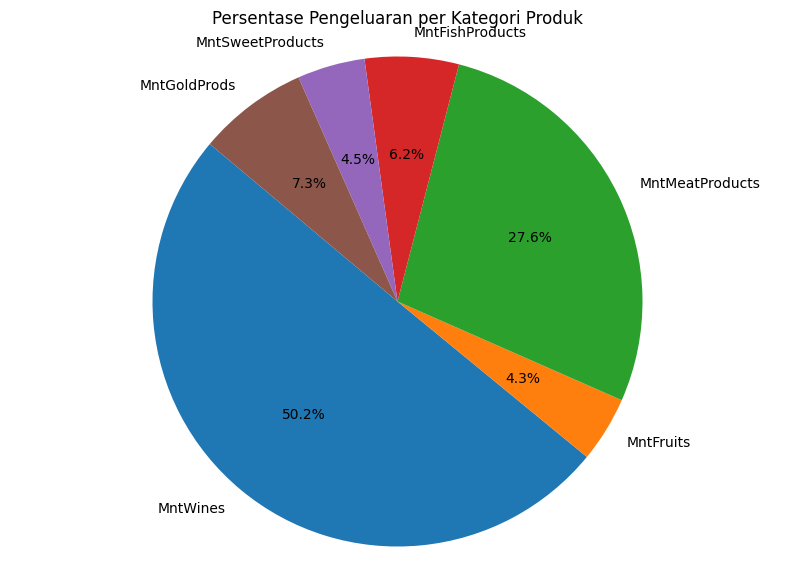

In [55]:
# Menghitung total pengeluaran per kategori
total_spending_per_category = df[products_columns].sum()

# Visualisasi pie chart
plt.figure(figsize=(10, 7))
plt.pie(total_spending_per_category, labels=total_spending_per_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pengeluaran per Kategori Produk')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

# Pengaruh Jumlah Anak di Rumah terhadap Pengeluaran dan Preferensi Produk

Menganalisis pengeluaran rata-rata berdasarkan jumlah anak di rumah dan memvisualisasikannya.

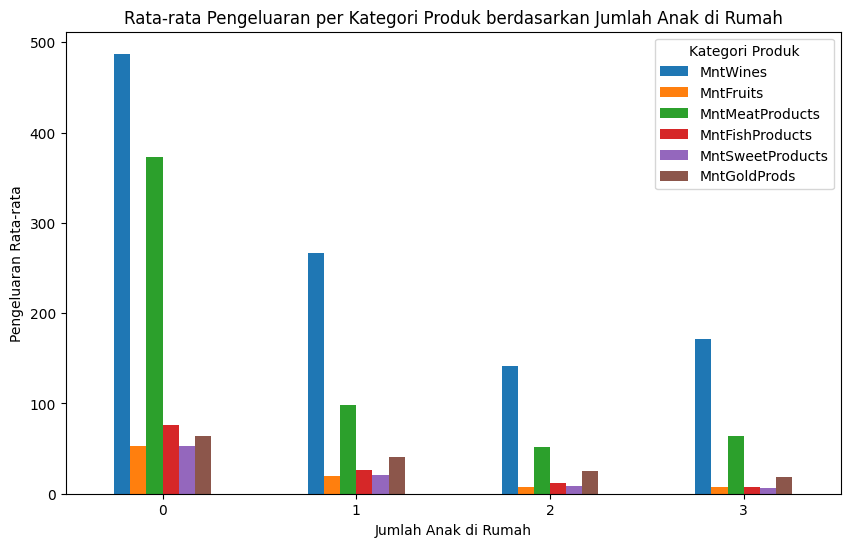

In [56]:
# Membuat kolom total anak
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Menghitung rata-rata pengeluaran berdasarkan jumlah anak
spending_by_children = df.groupby('Total_Children')[products_columns].mean().reset_index()

# Visualisasi
spending_by_children.set_index('Total_Children').plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Pengeluaran per Kategori Produk berdasarkan Jumlah Anak di Rumah')
plt.ylabel('Pengeluaran Rata-rata')
plt.xlabel('Jumlah Anak di Rumah')
plt.xticks(rotation=0)
plt.legend(title='Kategori Produk')
plt.show()